# DPS result eda


### Check result


In [1]:
import os
import json

In [3]:
file_list = ["part-00000", "part-00001", "part-00002", "part-00003"]

result_input_path = "../dps/datasets/test_output_data/"


In [4]:
input_files = []

for file in file_list:
    input_files.append(os.path.join(result_input_path, file))

print(input_files)

['../dps/datasets/test_output_data/part-00000', '../dps/datasets/test_output_data/part-00001', '../dps/datasets/test_output_data/part-00002', '../dps/datasets/test_output_data/part-00003']


In [5]:
def file_iterator(file_list):
    """각 파일에서 줄 단위로 데이터를 읽어오는 이터레이터."""
    for file_name in file_list:
        with open(file_name, 'r', encoding='utf-8') as file:
            for line in file:
                yield line

def merge_files_to_jsonl(input_files, output_file):
    """여러 파일의 내용을 하나의 JSONL 파일로 병합."""
    with open(output_file, 'w', encoding='utf-8') as out_file:
        for line in file_iterator(input_files):
            # 각 줄이 이미 JSON 형식이라고 가정하고 직접 쓴다.
            out_file.write(line)

# 사용 예시

output_file = '../korean_data/aihub_merged.jsonl'  # 결과 파일 이름


merge_files_to_jsonl(input_files, output_file)

In [2]:
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

def analyze_jsonl_file(file_path):
    # 글자 수를 저장할 리스트 초기화
    text_lengths = []

    # 파일을 열고 각 줄을 순회
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in tqdm(file, desc="Analyzing"):
            data = json.loads(line)
            # "target_text" 필드의 길이(글자 수)를 리스트에 추가
            text_lengths.append(len(data["text"]))

    return text_lengths

# def plot_text_length_distribution(text_lengths):
#     # 글자 수의 분포를 히스토그램으로 표시
#     plt.figure(figsize=(10, 6))
#     plt.hist(text_lengths, bins=100, color='skyblue', edgecolor='black')
#     plt.title('Distribution of "target_text" Lengths')
#     plt.xlabel('Length of "target_text"')
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()

# JSONL 파일 경로 설정
file_path = '../korean_data/aihub_merged.jsonl'

# 파일 분석 및 글자 수 계산
text_lengths = analyze_jsonl_file(file_path)

# 글자 수 분포 시각화
# plot_text_length_distribution(text_lengths)


Analyzing: 116235048it [05:18, 365184.36it/s]


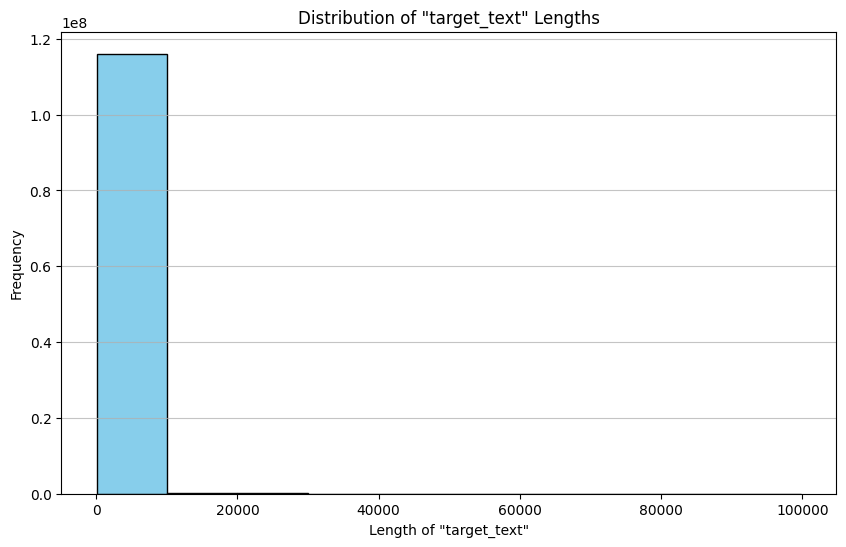

In [8]:
def plot_text_length_distribution(text_lengths):
    # 글자 수의 분포를 히스토그램으로 표시
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins=10, color='skyblue', edgecolor='black')
    plt.title('Distribution of "target_text" Lengths')
    plt.xlabel('Length of "target_text"')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


# 글자 수 분포 시각화
plot_text_length_distribution(text_lengths)


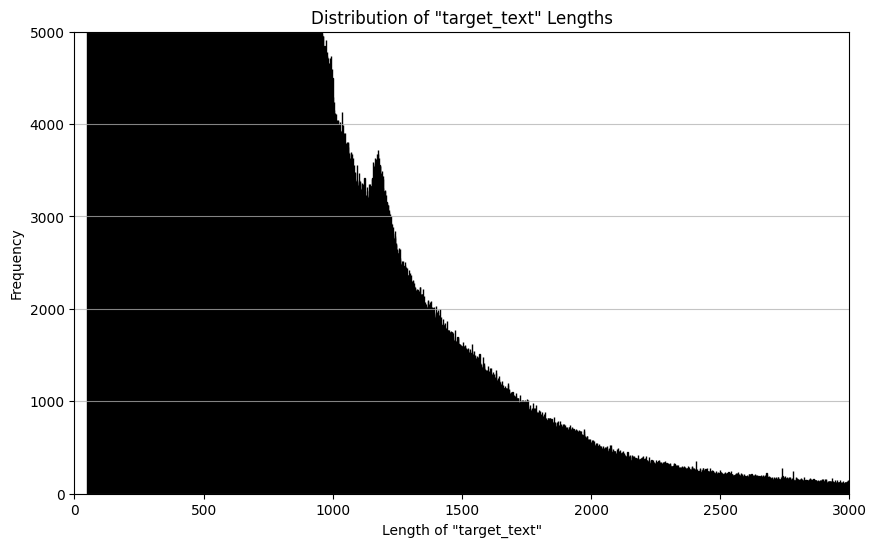

In [13]:
import matplotlib.pyplot as plt

def plot_text_length_distribution(text_lengths):
    # 글자 수의 분포를 히스토그램으로 표시
    plt.figure(figsize=(10, 6))
    plt.hist(text_lengths, bins="auto", color='skyblue', edgecolor='black')
    plt.title('Distribution of "target_text" Lengths')
    plt.xlabel('Length of "target_text"')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.xlim(0, 3000) # x축의 범위를 설정
    plt.ylim(0, 5000)  
    plt.show()

# 글자 수 분포 시각화 함수 호출
plot_text_length_distribution(text_lengths)


In [3]:
max_lenth = max(text_lengths)

print(max_lenth)

99808


In [5]:
print(len(text_lengths))

116235048


In [6]:
from concurrent.futures import ProcessPoolExecutor, as_completed

# 조건에 맞는 요소의 수를 세는 함수
def count_range_in_segment(data_segment, start, end):
    return sum(1 for x in data_segment if start <= x <= end)

# 메인 함수: 전체 데이터를 분할하여 병렬 처리
def count_range_in_list(nums, start, end, num_workers=4):
    # 데이터를 분할
    segment_size = len(nums) // num_workers
    segments = [nums[i:i + segment_size] for i in range(0, len(nums), segment_size)]
    
    # 병렬 처리
    counts = []
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(count_range_in_segment, segment, start, end) for segment in segments]
        for future in as_completed(futures):
            counts.append(future.result())
    
    # 결과 합산
    return sum(counts)

# 사용 예시
if __name__ == "__main__":
    start, end = 20000, 100000
    total_count = count_range_in_list(text_lengths, start, end, num_workers=8)  # CPU 코어 수에 따라 num_workers 조정
    print(f"Total count of elements between {start} and {end}: {total_count}")


Total count of elements between 20000 and 100000: 40114


In [7]:
if __name__ == "__main__":
    start, end = 10000, 20000
    total_count = count_range_in_list(text_lengths, start, end, num_workers=8)  # CPU 코어 수에 따라 num_workers 조정
    print(f"Total count of elements between {start} and {end}: {total_count}")

Total count of elements between 10000 and 20000: 75965


In [8]:
if __name__ == "__main__":
    start, end = 2000, 10000
    total_count = count_range_in_list(text_lengths, start, end, num_workers=8)  # CPU 코어 수에 따라 num_workers 조정
    print(f"Total count of elements between {start} and {end}: {total_count}")

Total count of elements between 2000 and 10000: 416454


In [9]:
if __name__ == "__main__":
    start, end = 50, 2000
    total_count = count_range_in_list(text_lengths, start, end, num_workers=8)  # CPU 코어 수에 따라 num_workers 조정
    print(f"Total count of elements between {start} and {end}: {total_count}")

Total count of elements between 50 and 2000: 115703059
